In [2]:
# read csv file and clean the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
def read_csv(file_path):
    """
    Read csv file and return a pandas dataframe
    
    Parameters:
    file_path: str, path to the csv file
    
    Returns:
    data: pandas dataframe
    """
    data = pd.read_csv(file_path)
    return data

In [4]:
# calculate the temperature from the resistance of a PT100
def PT100_Temperature(PT100_Resistance):
    A = 3.9083e-3
    B = -5.775e-7
    R0 = 100.0
    T = (-R0 * A + np.sqrt(R0**2 * A**2 - 4 * R0 * B * (R0 - PT100_Resistance))) / (2 * R0 * B)
    return T


def PT100_Resistance(V_in, V_diff, R1, R2):
    num = R1 * (R2/(R1+R2) + V_diff/V_in)
    den = 1 - (R2/(R1+R2) + V_diff/V_in)
    return num/den

def PT100_Resistance(V_in, V_diff, R1, R2, R3):
    num = R1 * (R3/(R2+R3) + V_diff/V_in)
    den = 1 - (R3/(R2+R3) + V_diff/V_in)
    return num/den


In [5]:
Kupfer_Konstantan = read_csv('data_combined/Kupfer_Konstantan_Full_Range.csv')
Kupfer_Nickel = read_csv('data_combined/Kupfer_Nickel_Full_Range.csv')

Kupfer_Konstantan['V_R'] = Kupfer_Konstantan['V_R']/1000
Kupfer_Nickel['V_R'] = Kupfer_Nickel['V_R']/1000

Kupfer_Konstantan['V_T'] = Kupfer_Konstantan['V_T']/1000
Kupfer_Nickel['V_T'] = Kupfer_Nickel['V_T']/1000

Kupfer_Konstantan['Resistance'] = PT100_Resistance(5.017, Kupfer_Konstantan['V_R'], 2200, 100)
Kupfer_Konstantan['Temperature'] = PT100_Temperature(PT100_Resistance(5.017, Kupfer_Konstantan['V_R'], 2200, 100))
Kupfer_Nickel['Resistance'] = PT100_Resistance(5.017, Kupfer_Nickel['V_R'], 2200, 100)
Kupfer_Nickel['Temperature'] = PT100_Temperature(PT100_Resistance(5.017, Kupfer_Nickel['V_R'], 2200, 100))

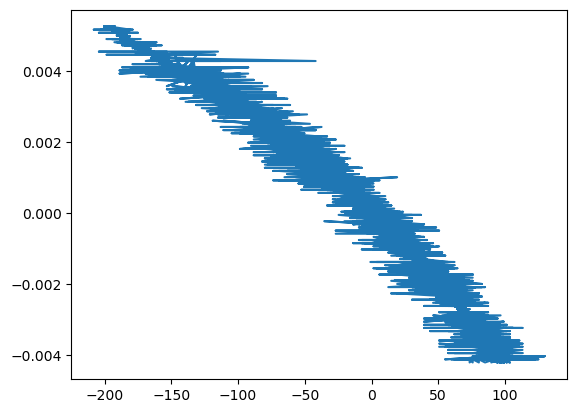

In [8]:
plt.plot(Kupfer_Konstantan['Temperature'], Kupfer_Konstantan['V_T'], label='Kupfer-Konstantan')

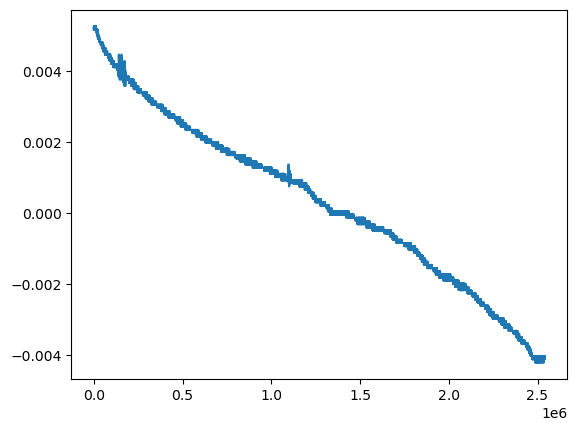

In [9]:
plt.plot(Kupfer_Konstantan['V_T'], label='Kupfer-Konstantan')

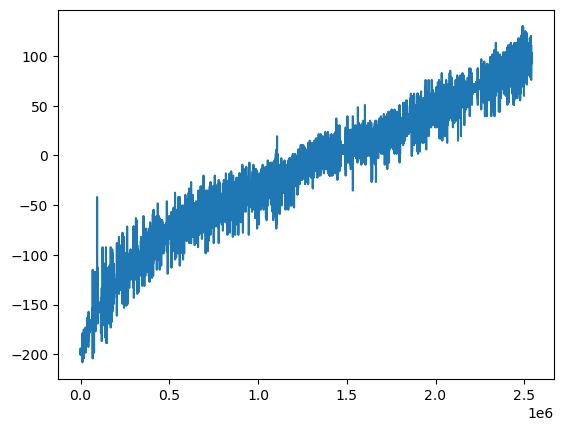

In [10]:
plt.plot(Kupfer_Konstantan['Temperature'], label='Kupfer-Konstantan')

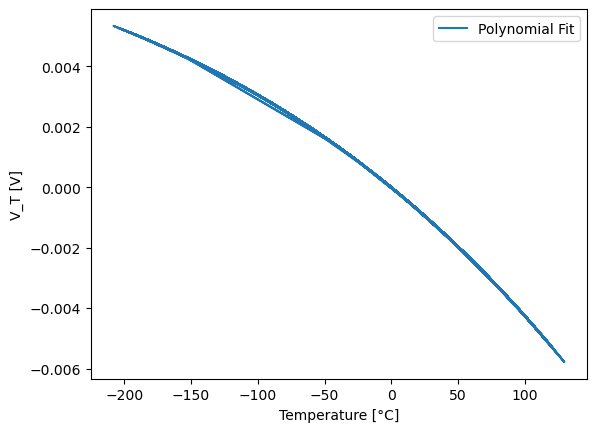

In [9]:
# fit a polynomial to Temperature vs V_T
z = np.polyfit(Kupfer_Konstantan['Temperature'], Kupfer_Konstantan['V_T'], 3)
p = np.poly1d(z)
plt.plot(Kupfer_Konstantan['Temperature'], p(Kupfer_Konstantan['Temperature']), label='Polynomial Fit')

plt.xlabel('Temperature [°C]')
plt.ylabel('V_T [V]')
plt.legend()